In [93]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

In [94]:
sm, md, lg = 13, 15, 20 
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [95]:
enrol = pd.read_csv('https://raw.githubusercontent.com/KolatimiDave/13-school-progress/master/data/gross-enrollment-ratio-2013-2016.csv')

In [96]:
enrol.head(5) 
enrol.shape

(110, 14)

In [97]:
sum(enrol.isna().sum())   #Check for missing values

0

In [98]:
enrol['State_UT'].unique(), len(enrol['State_UT'].unique())

(array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
        'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
        'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
        'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
        'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
        'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
        'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
        'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
        'West Bengal', 'All India', 'MADHYA PRADESH', 'Puducherry',
        'Telangana', 'Uttarakhand'], dtype=object),
 40)

In [99]:
#rename States
enrol['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

In [100]:
states = enrol['State_UT'].unique().tolist()

In [101]:
all_cols = enrol.columns.to_list()

In [102]:
obj = [i for i in all_cols if enrol[i].dtype == object]
len(obj)

5

### There are 'NR' values in the last 3 columns so I would impute 0 for all 'NR' which means 'Not Recorded'.

In [103]:
imputer = SimpleImputer(missing_values = 'NR', strategy='constant', fill_value=0)
imputer_1 = SimpleImputer(missing_values = '@', strategy='constant', fill_value=0)

In [104]:
enrol = imputer_1.fit_transform(enrol)
enrol = pd.DataFrame(imputer.fit_transform(enrol), columns=all_cols)

In [105]:
enrol.head(3)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.7,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.2,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27


In [106]:
categories = all_cols[2:]
enrol[categories] = enrol[categories].astype(float)

In [107]:
total_categories = [i for i in categories if i.split('_')[-1] == 'Total']

## Gross Enrolment of each student category type in each state

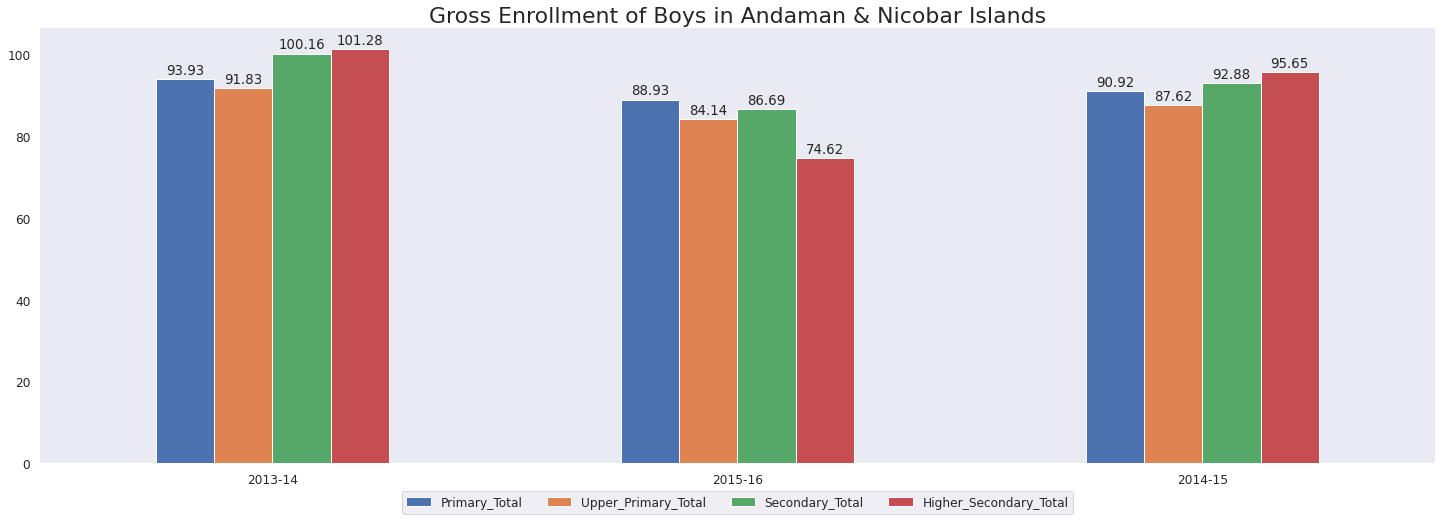

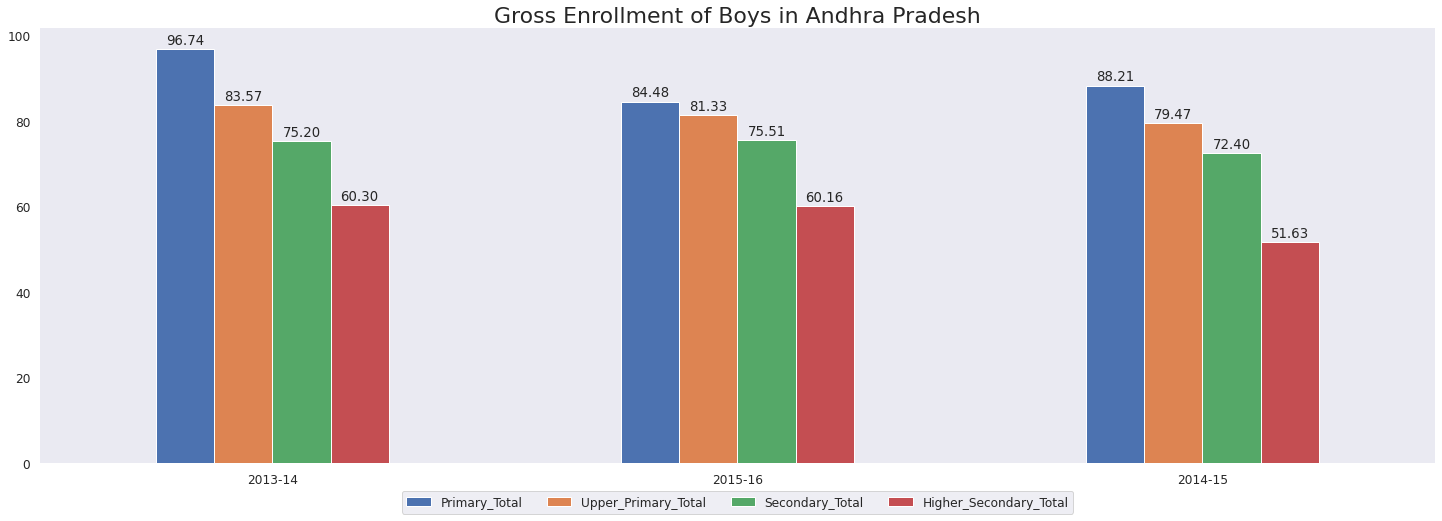

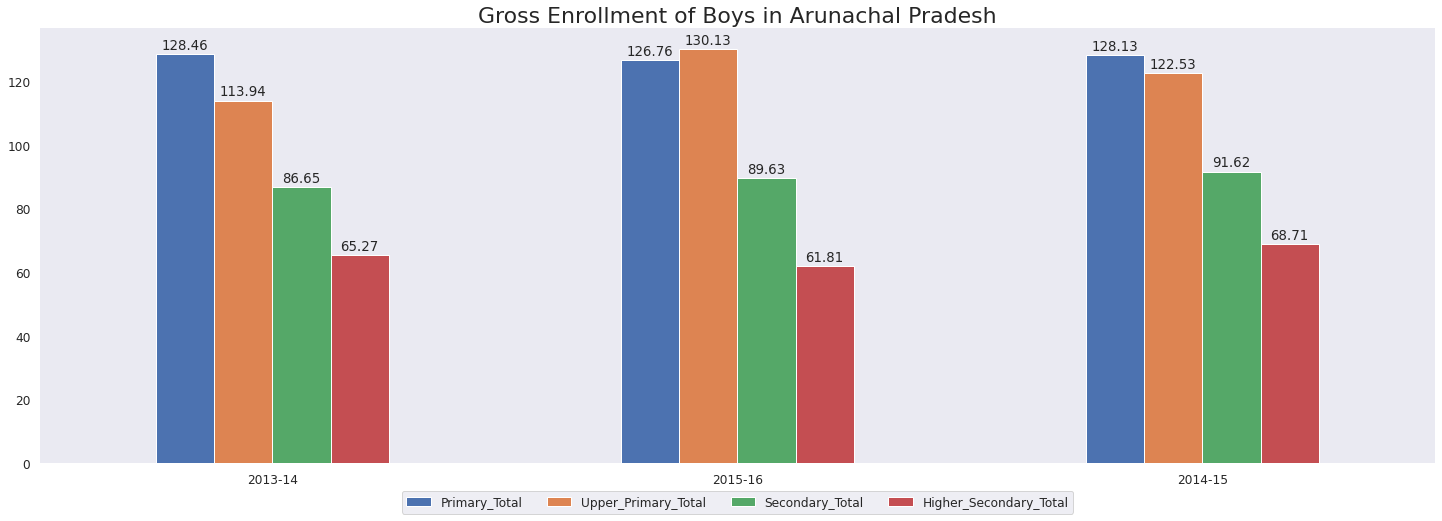

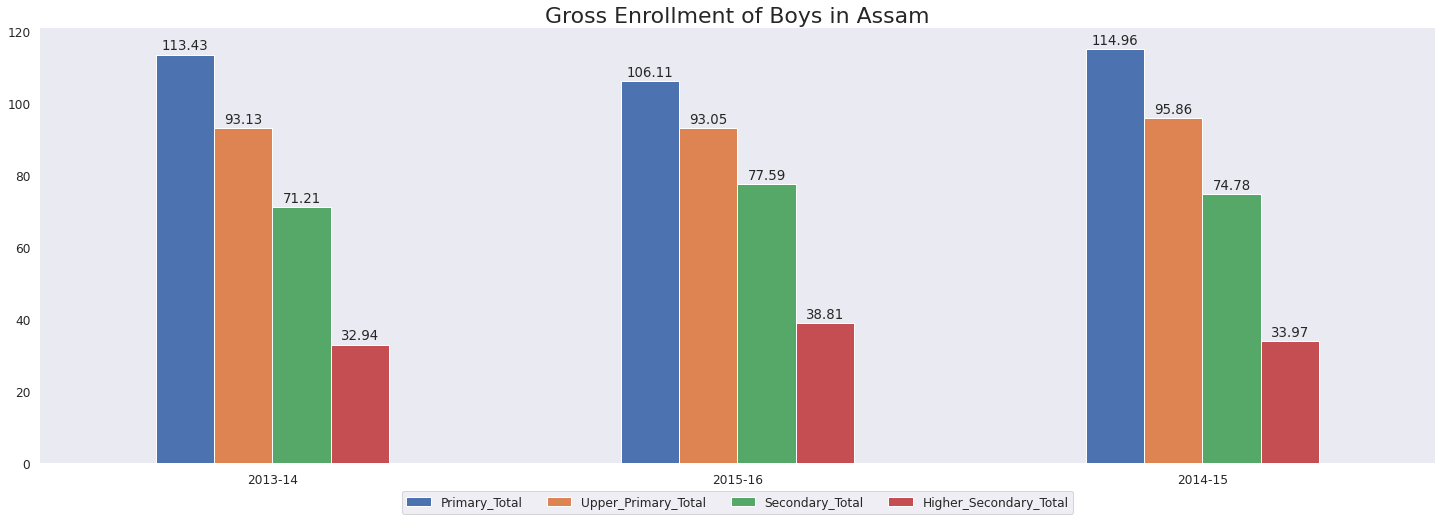

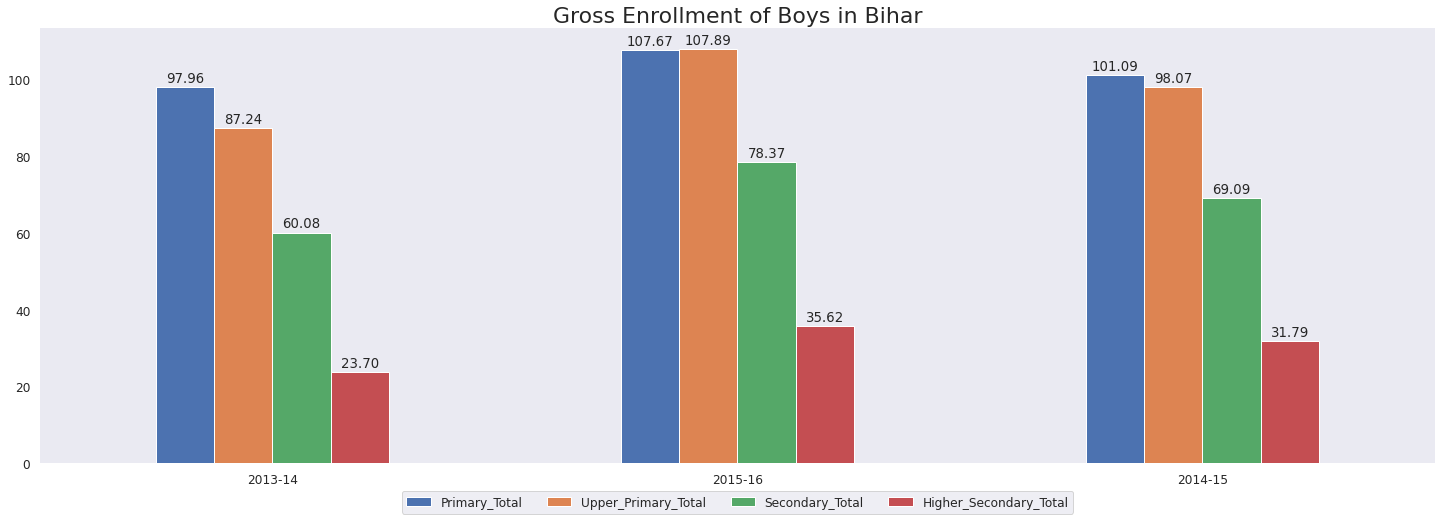

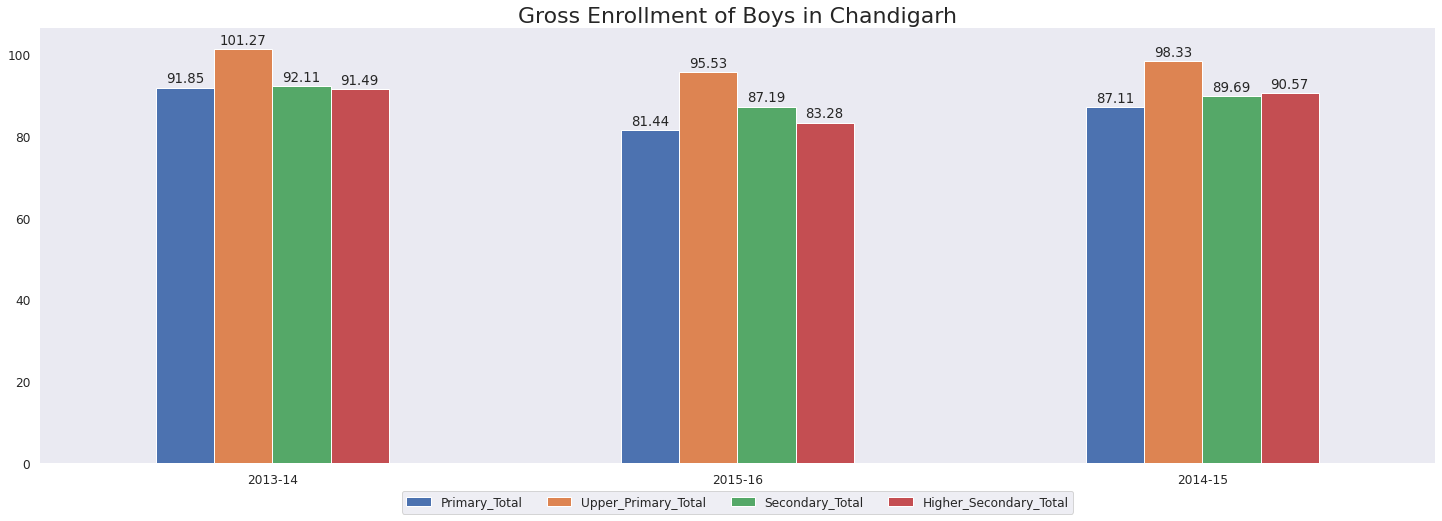

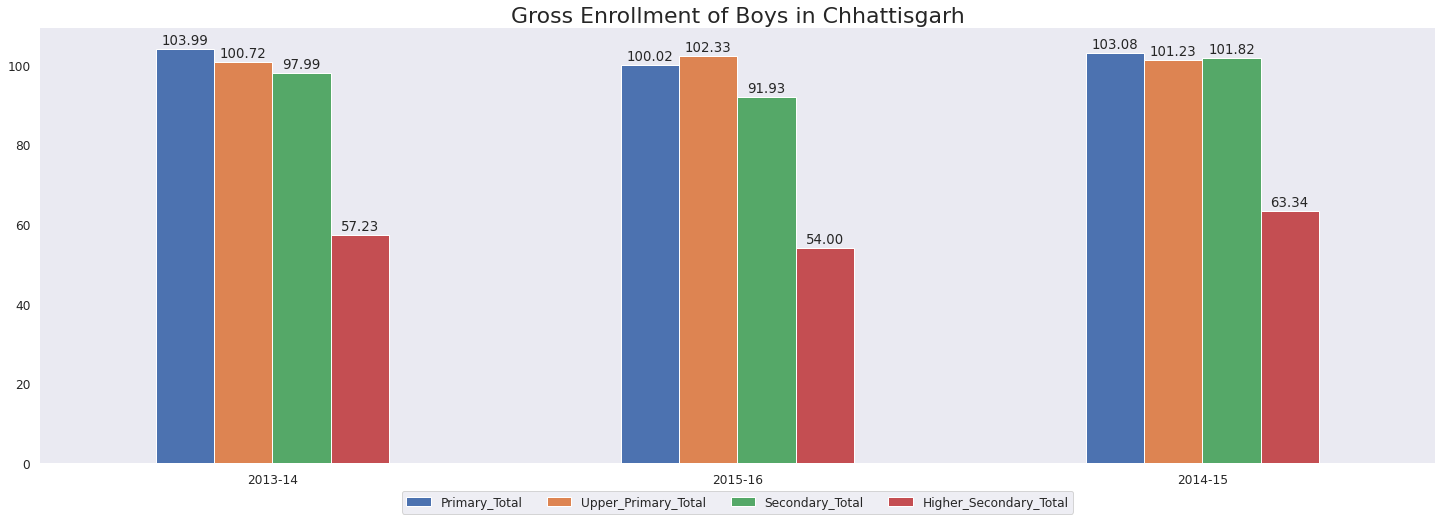

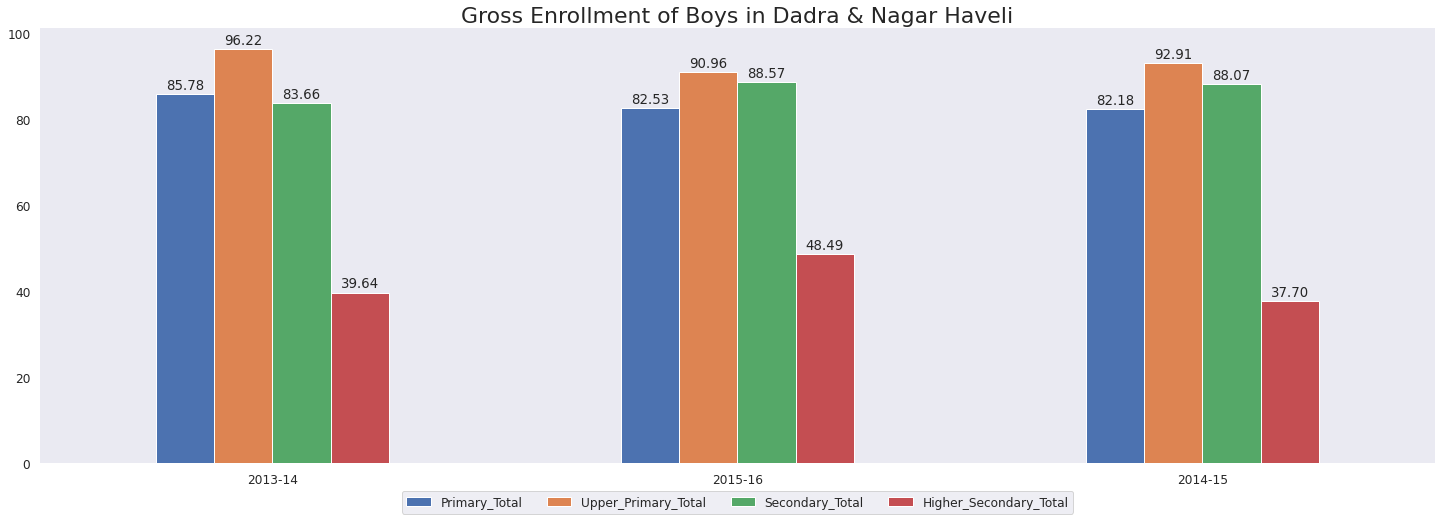

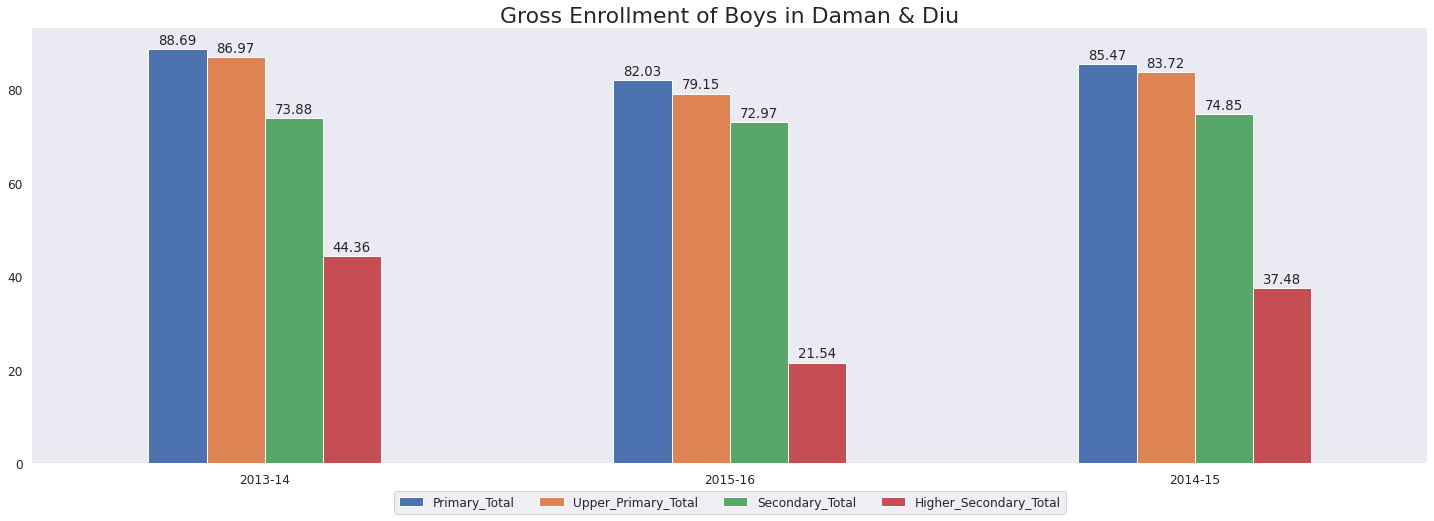

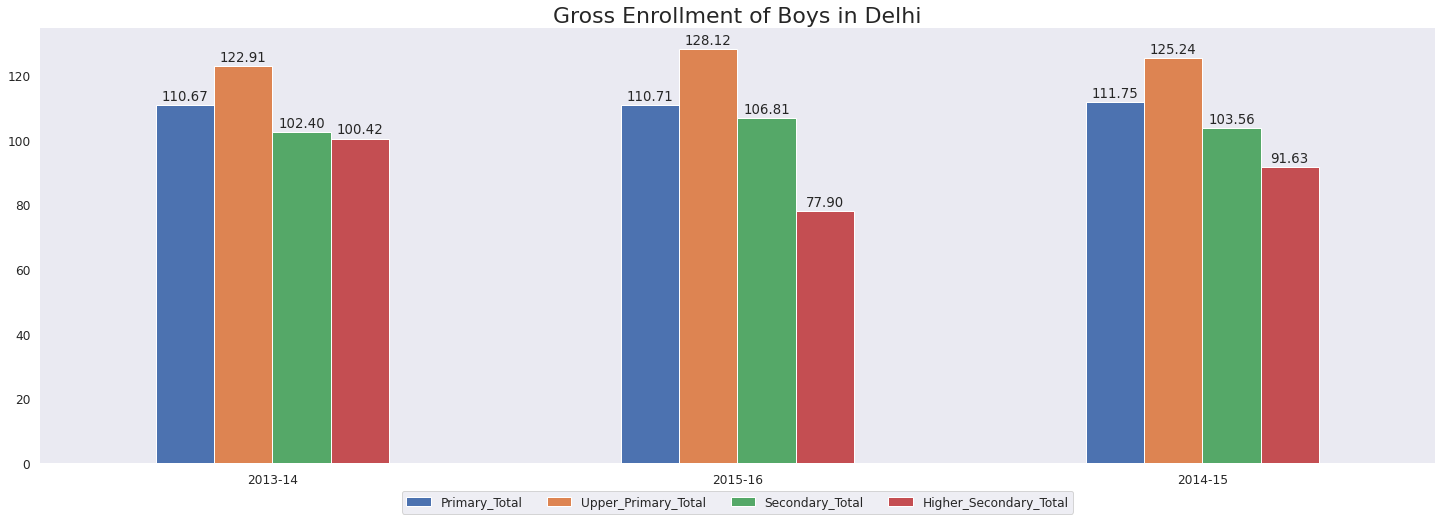

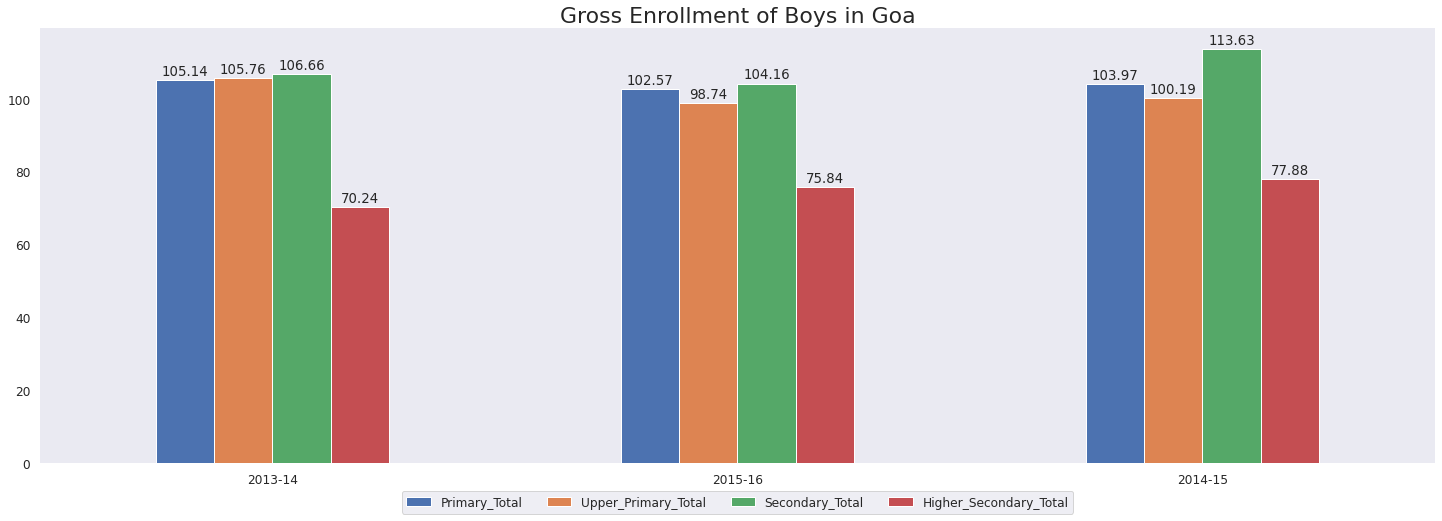

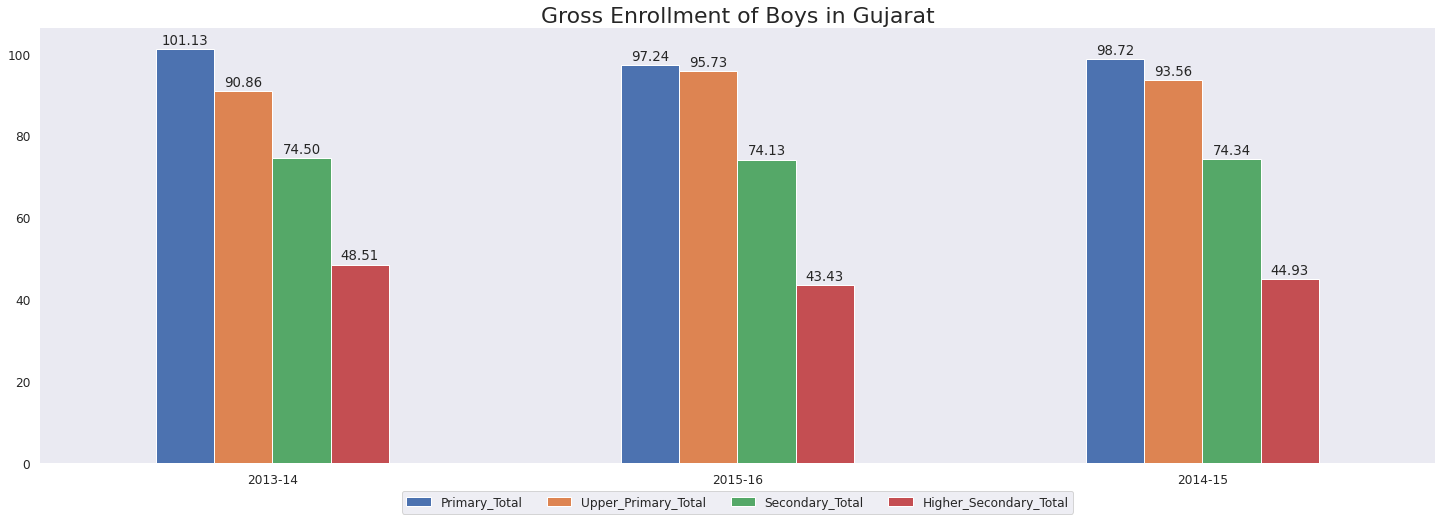

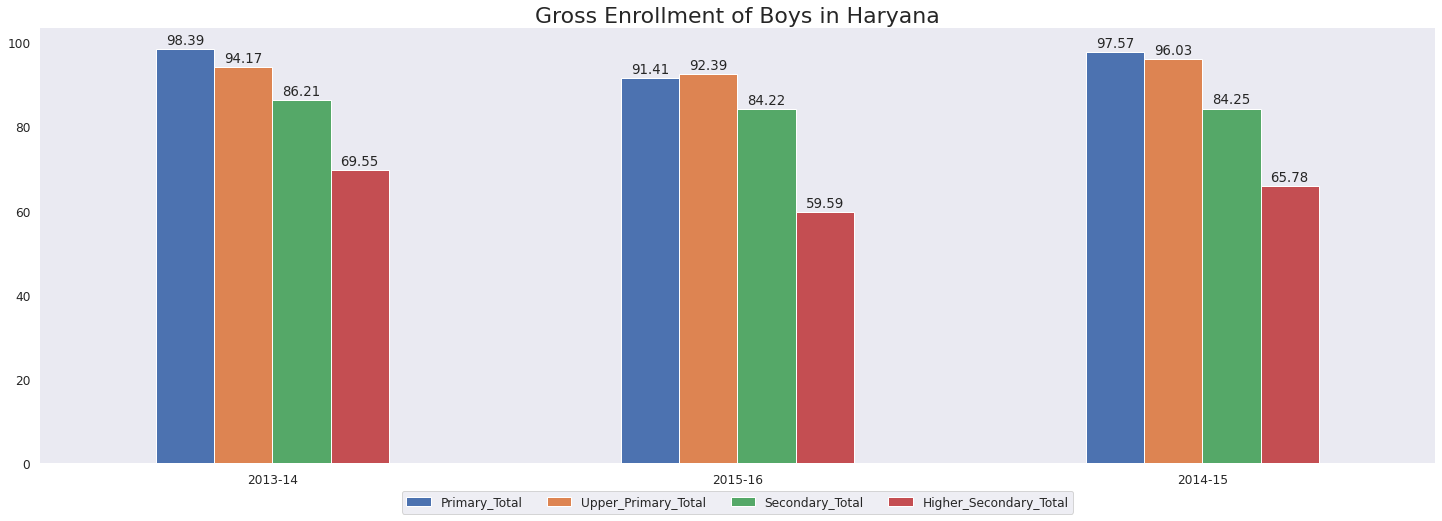

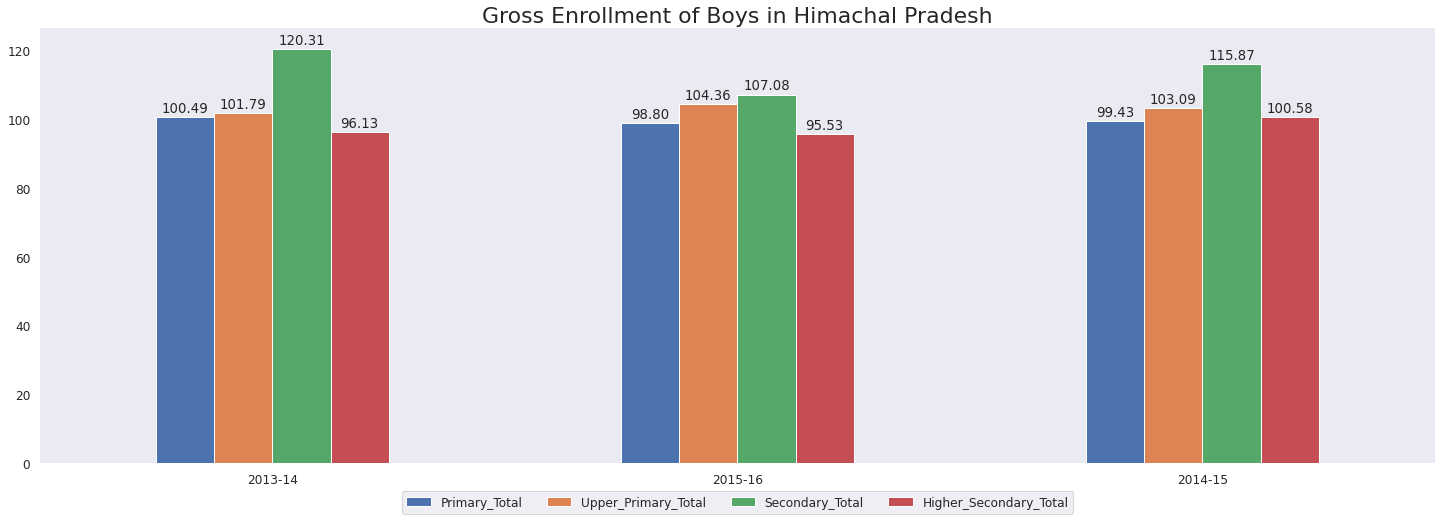

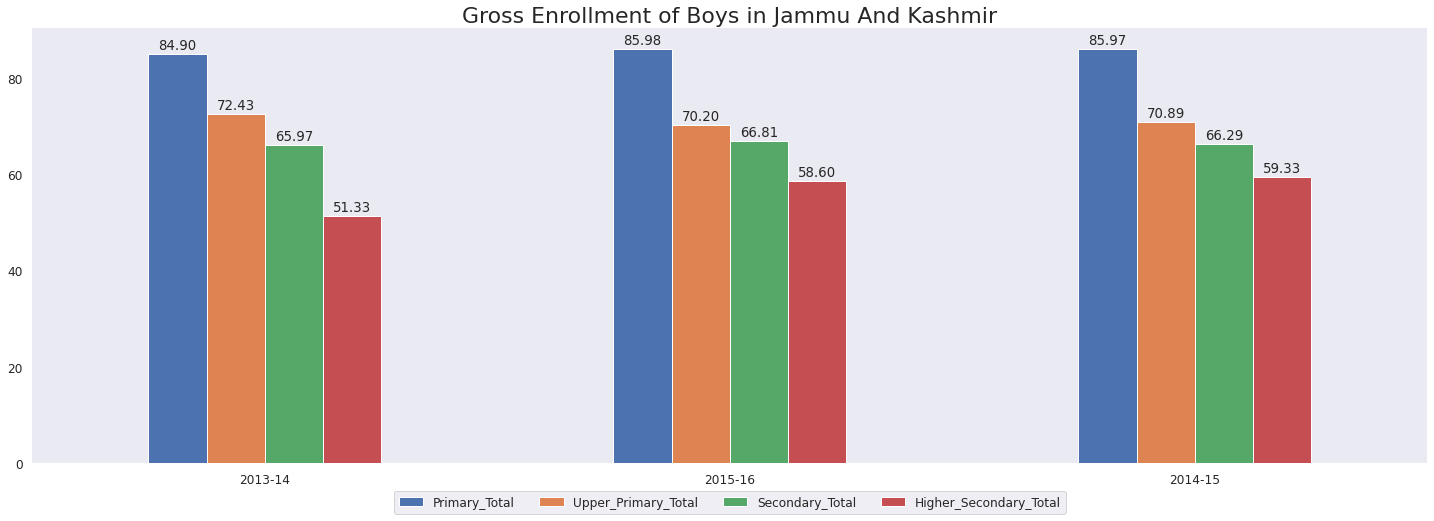

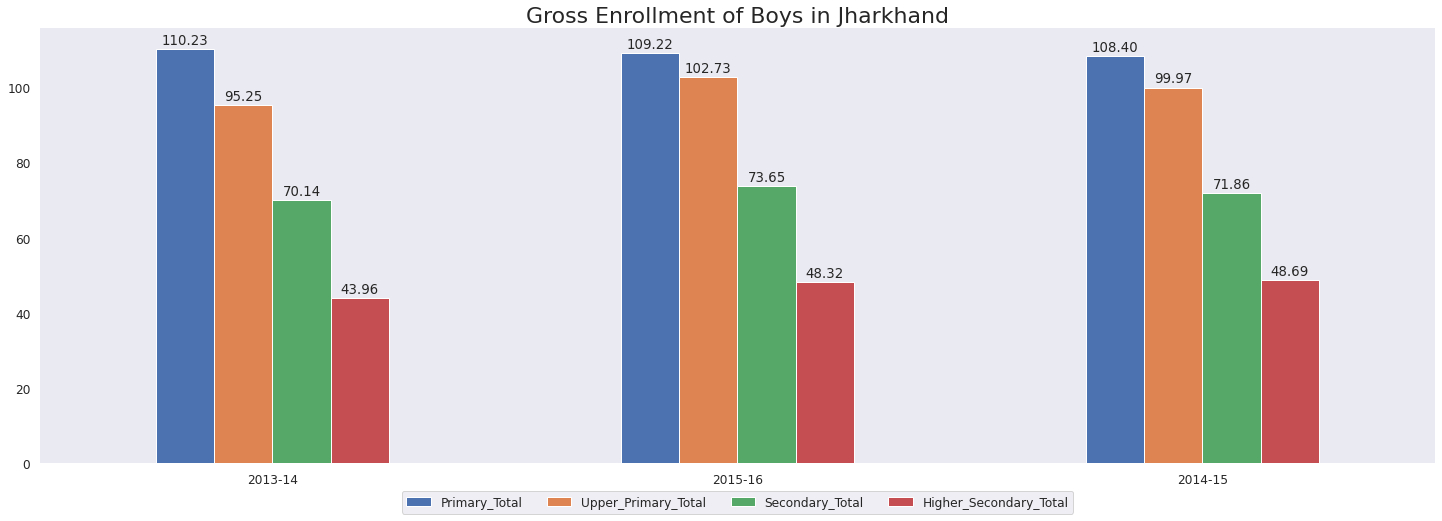

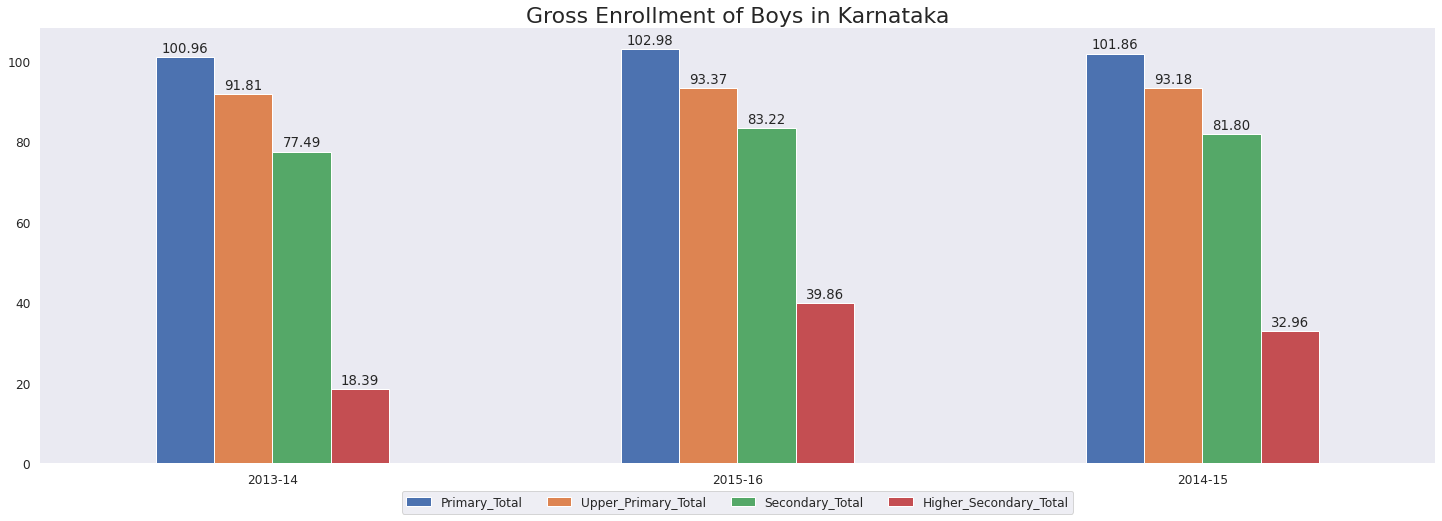

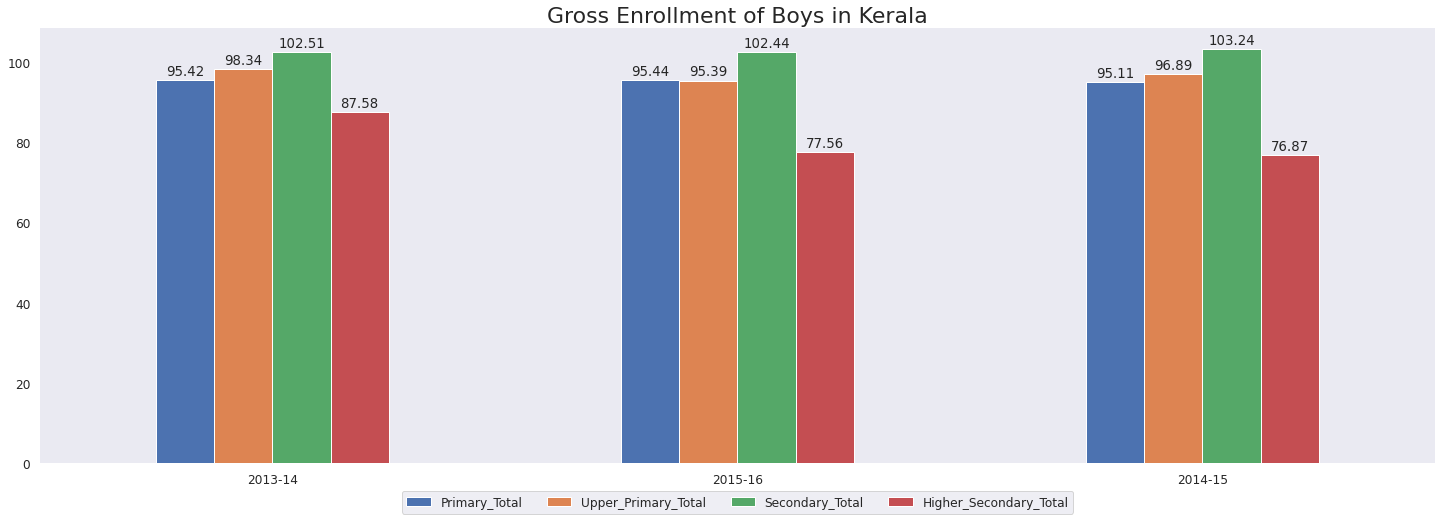

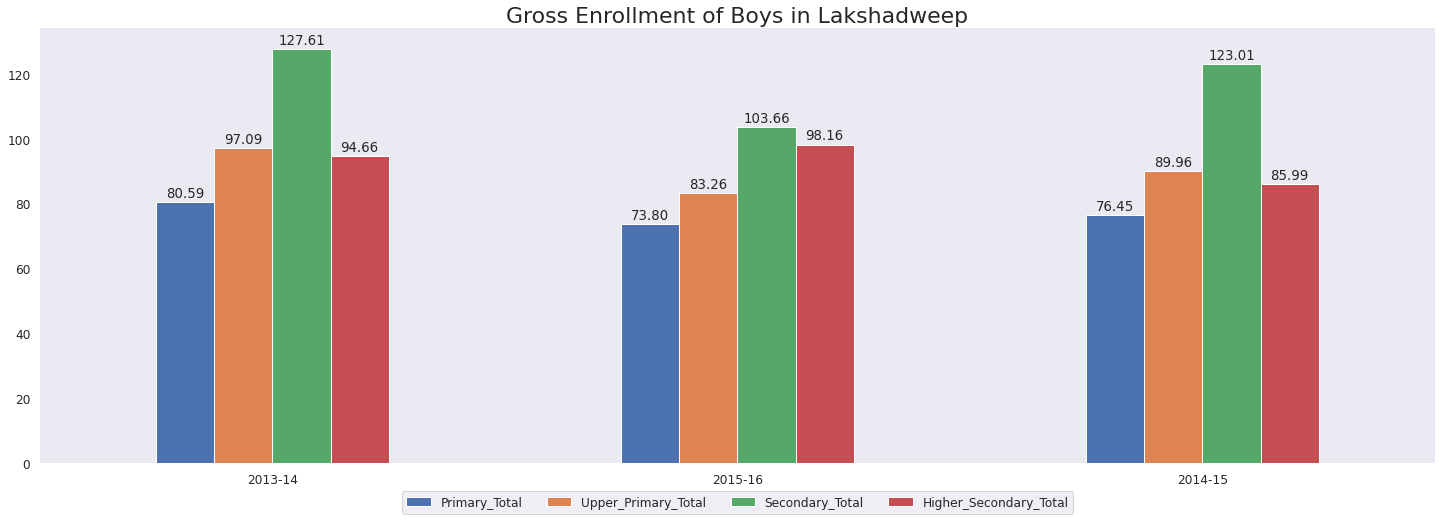

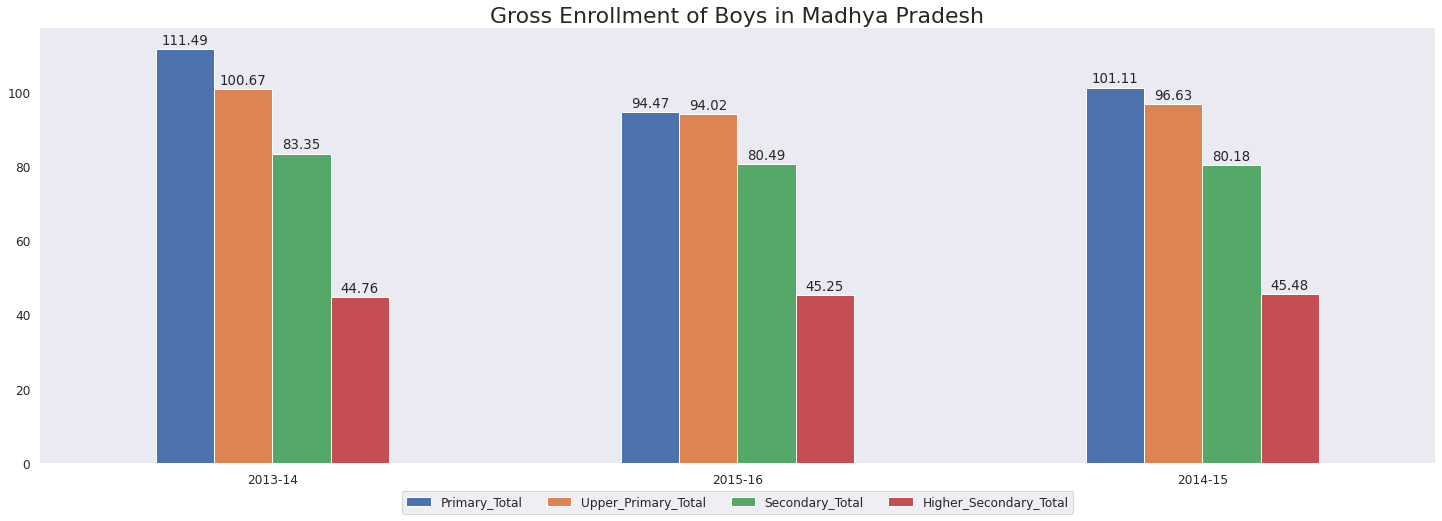

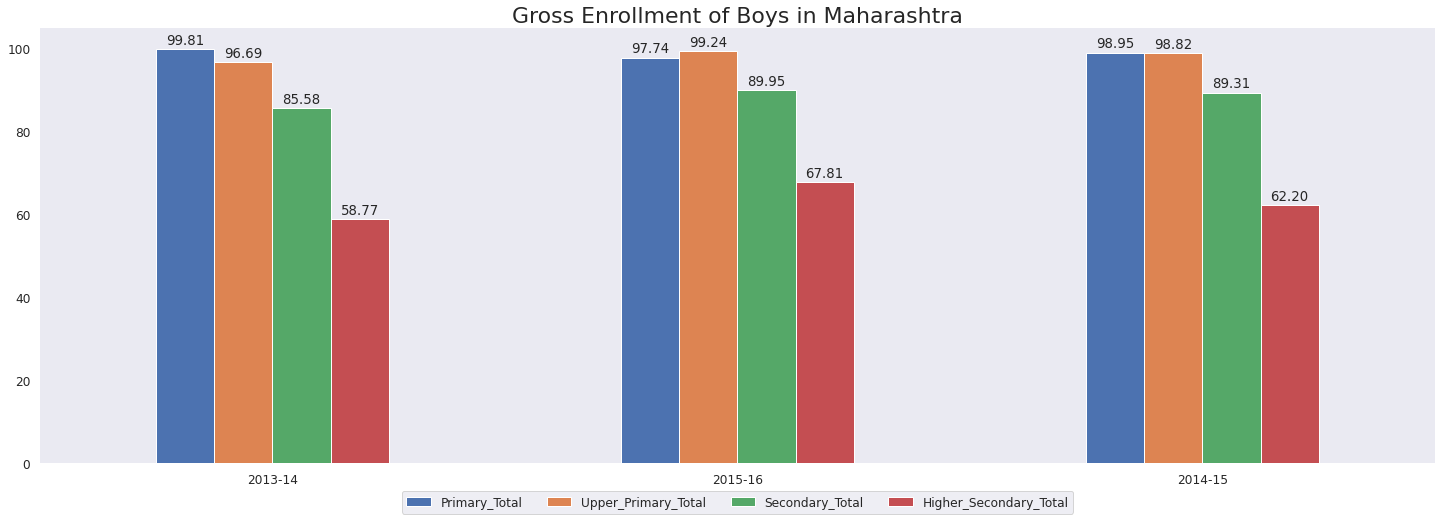

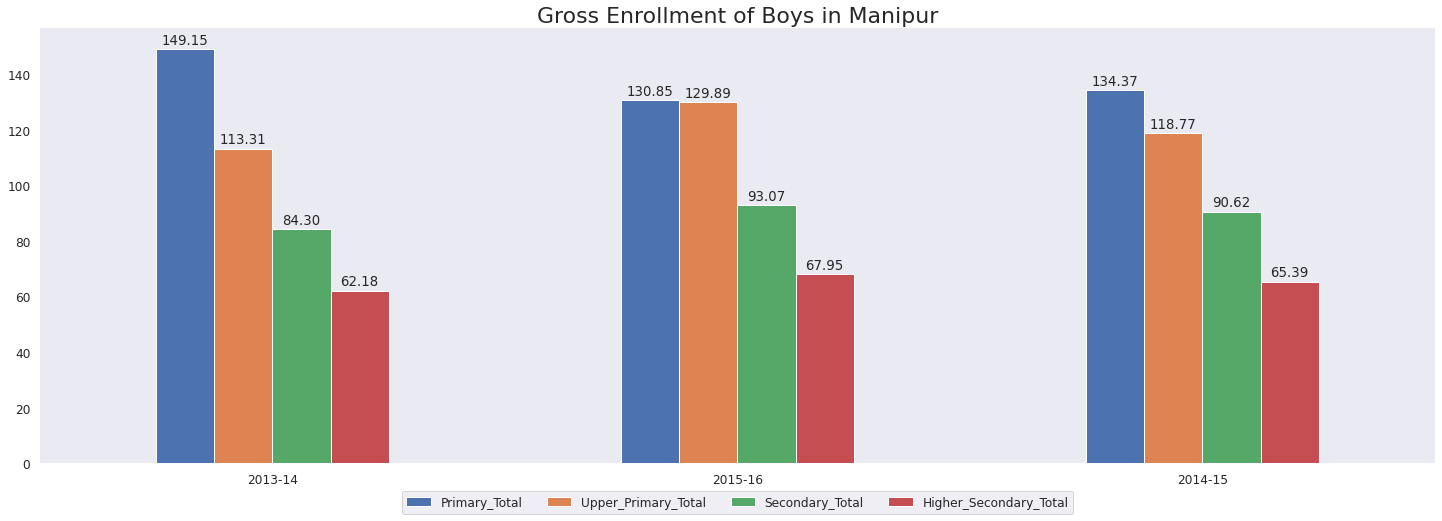

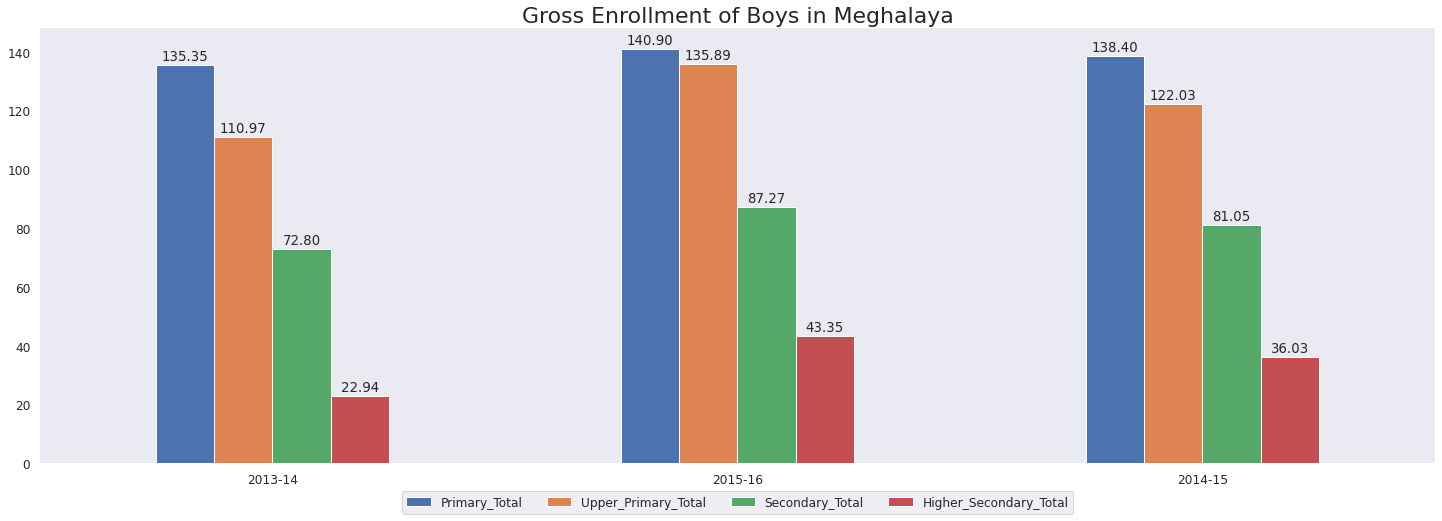

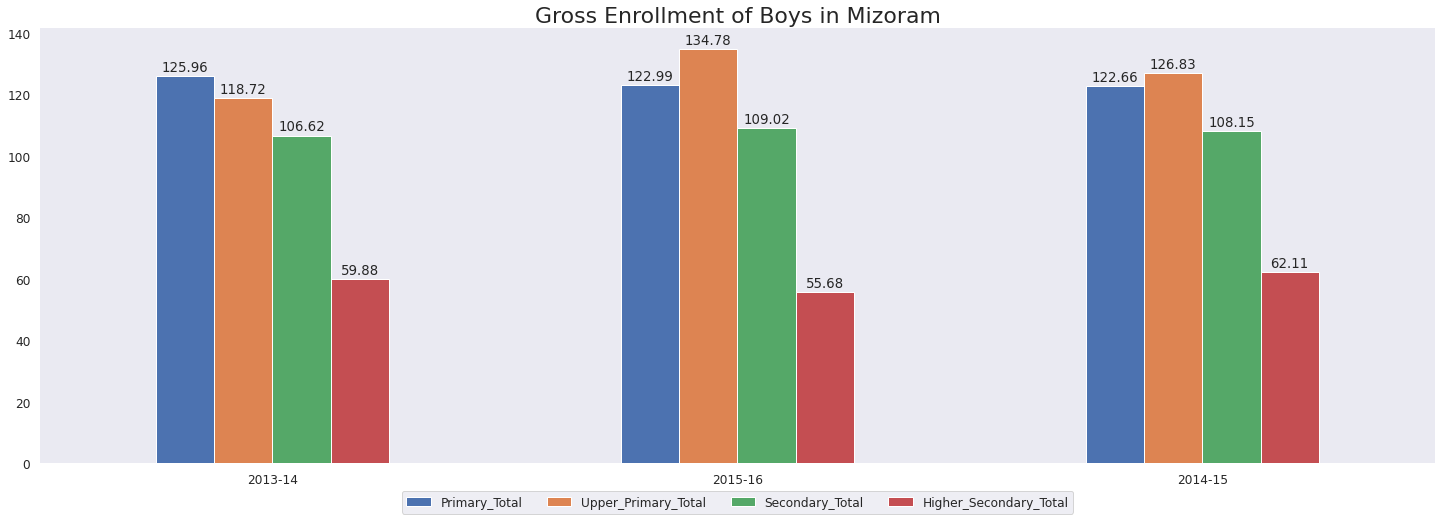

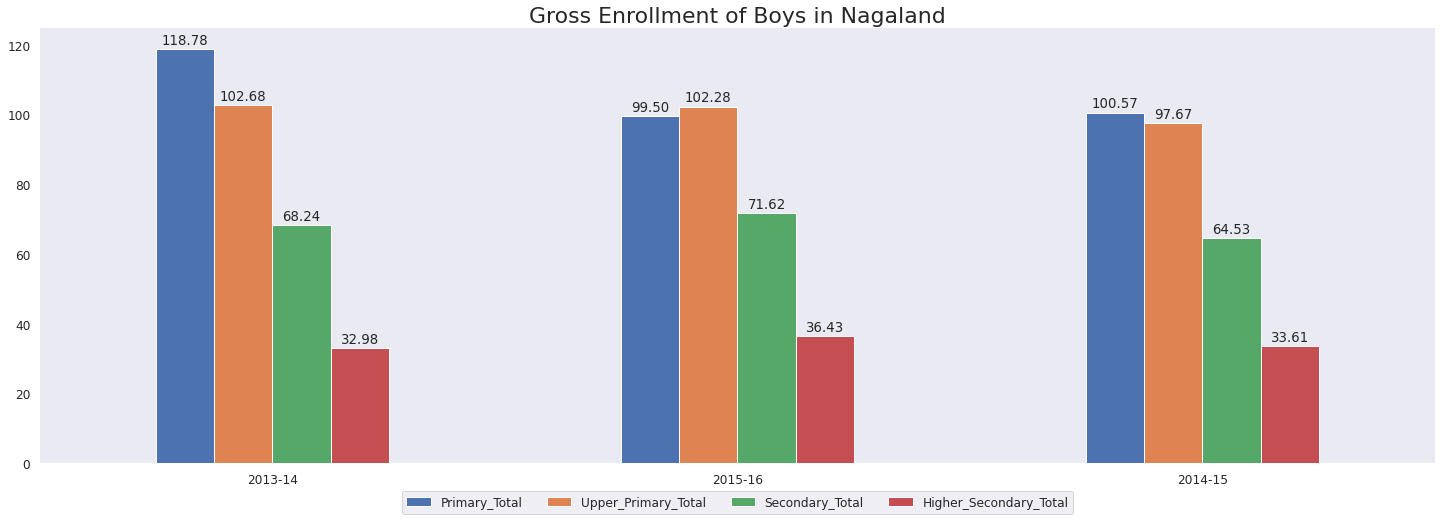

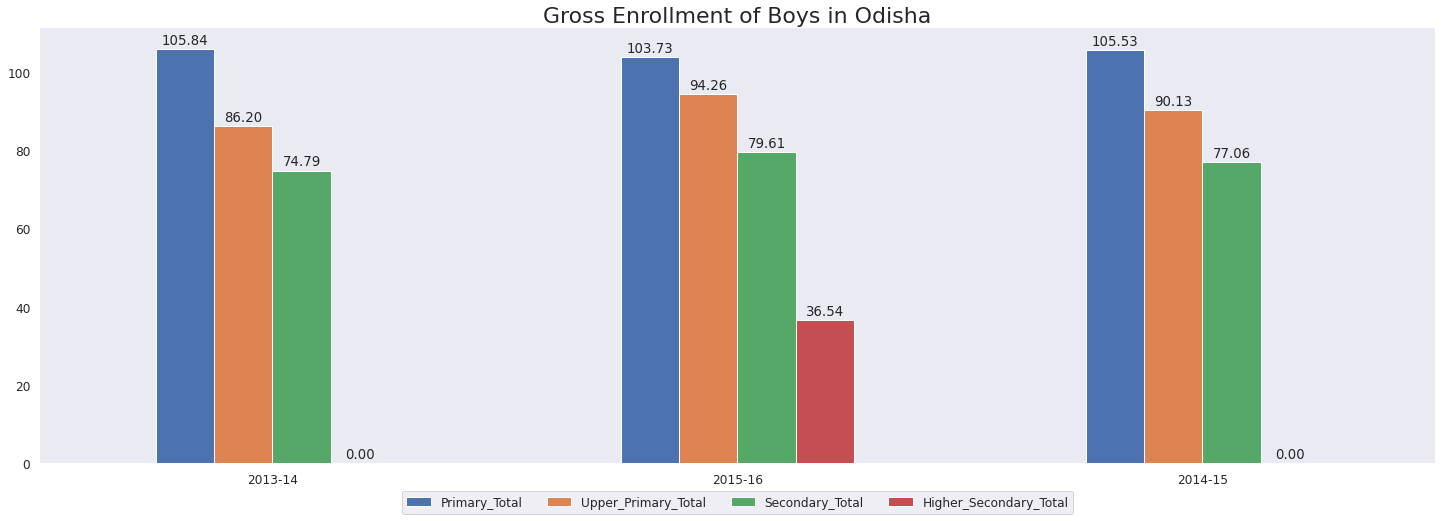

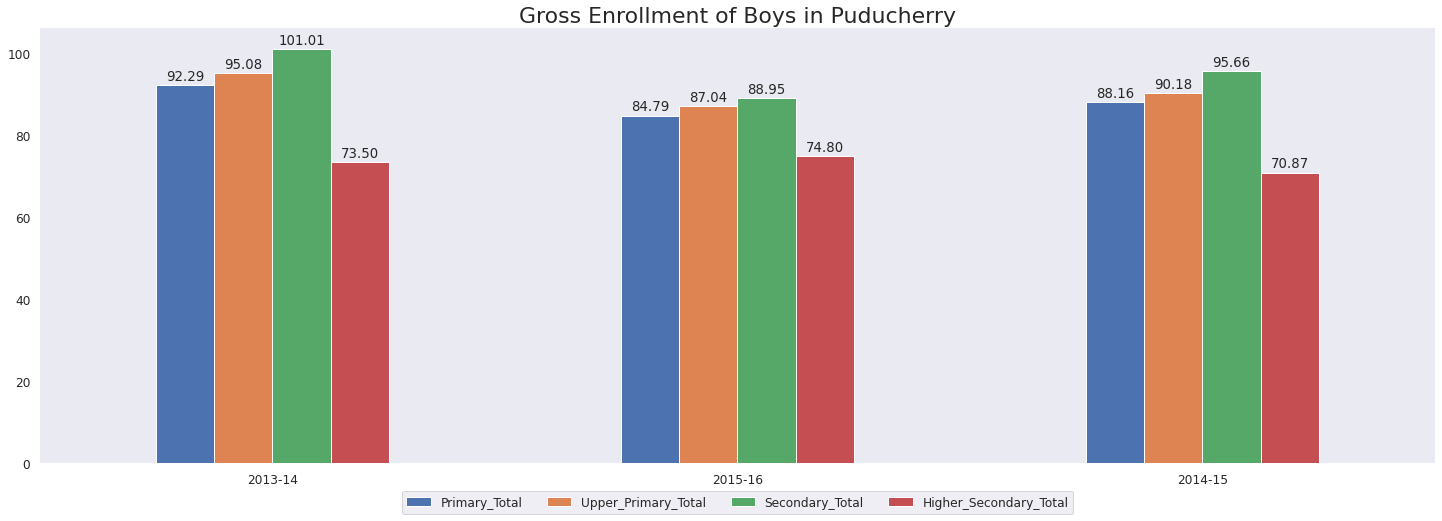

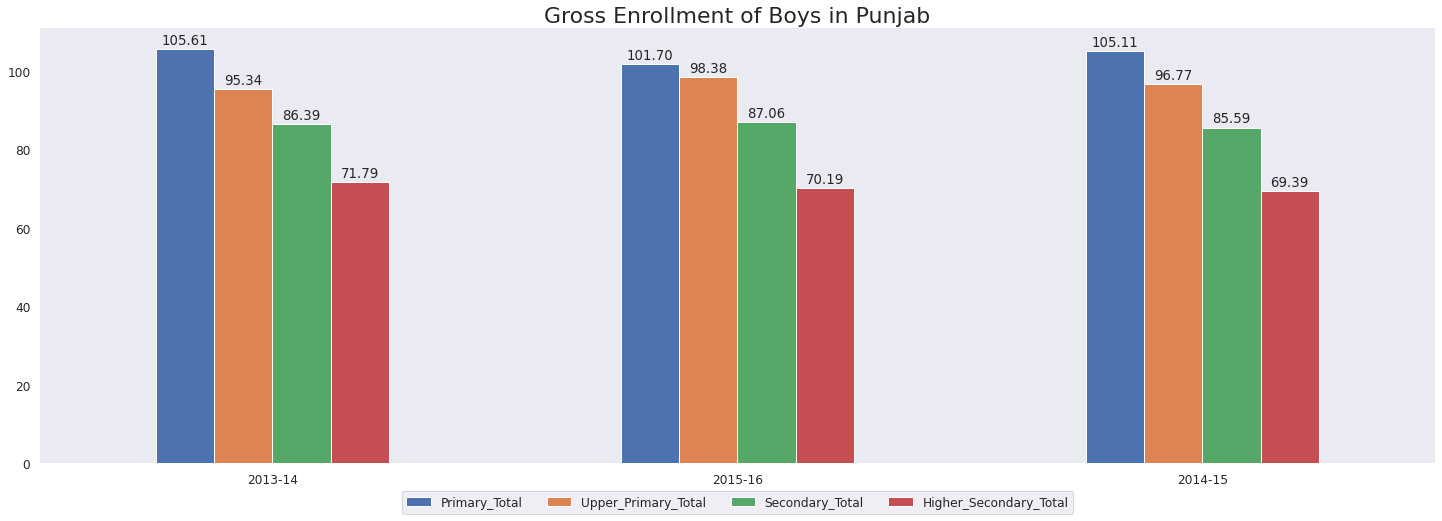

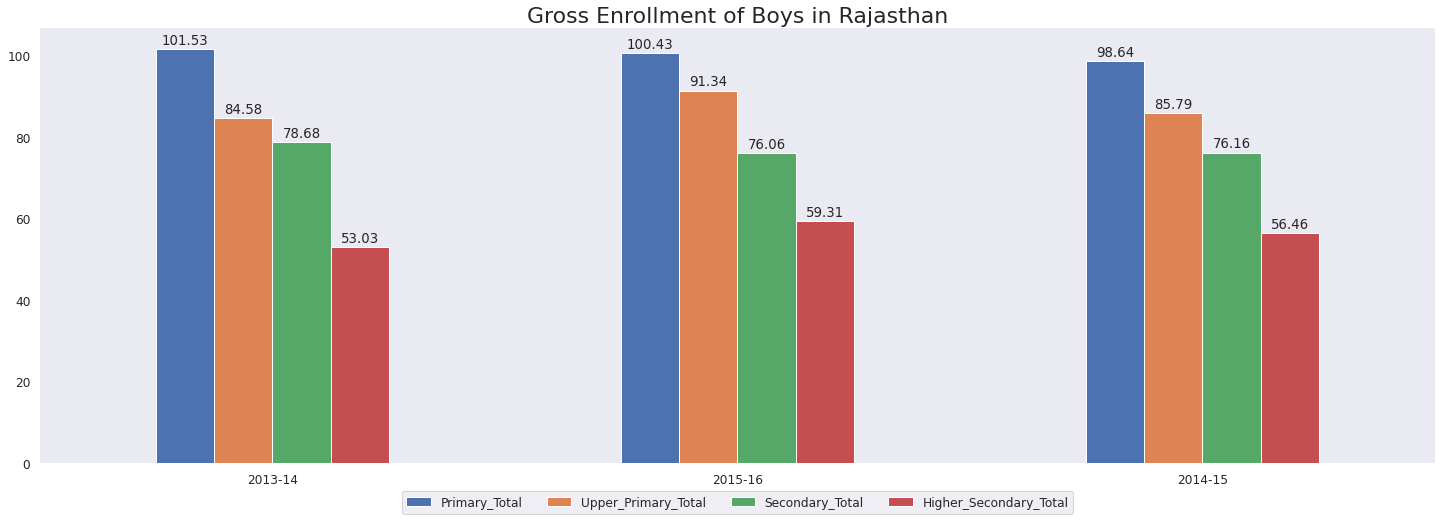

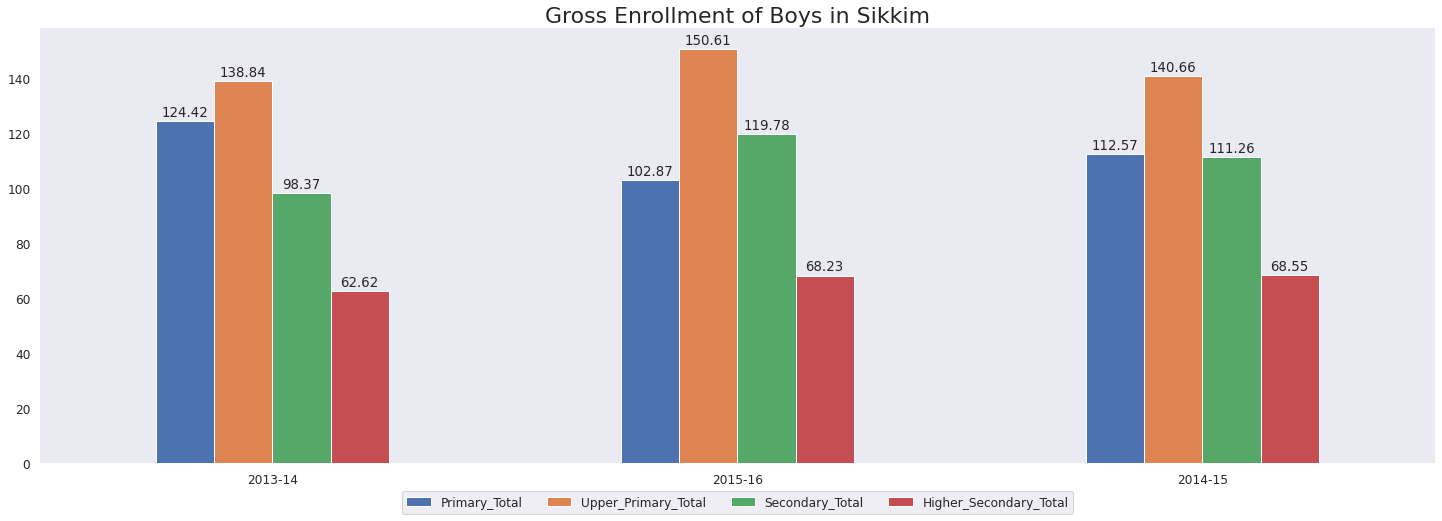

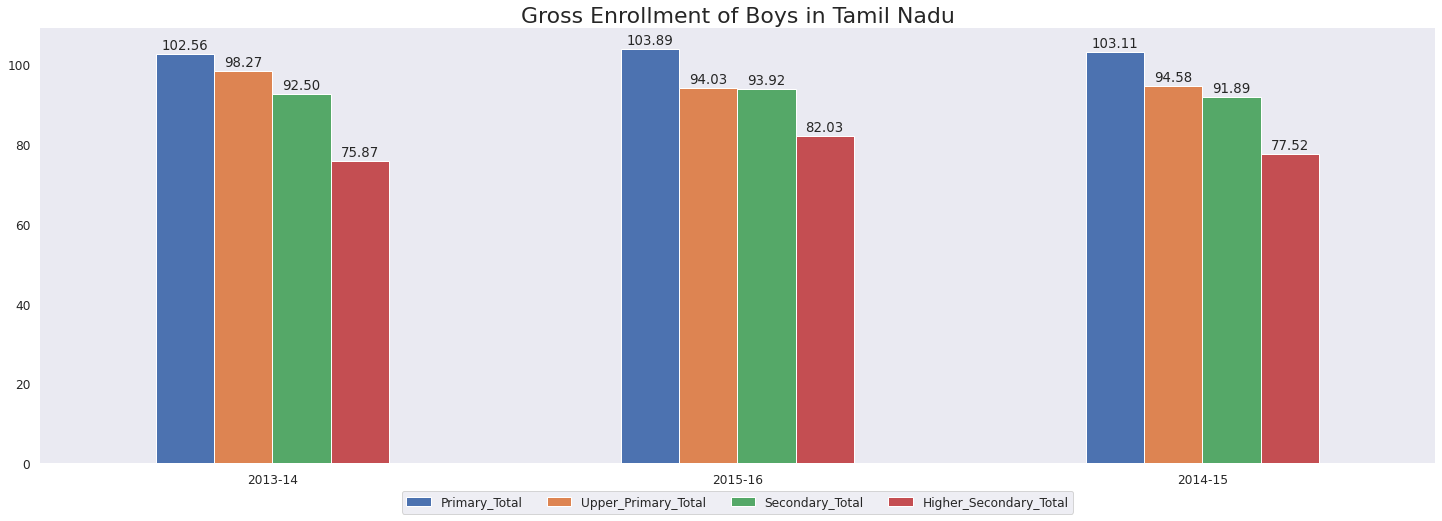

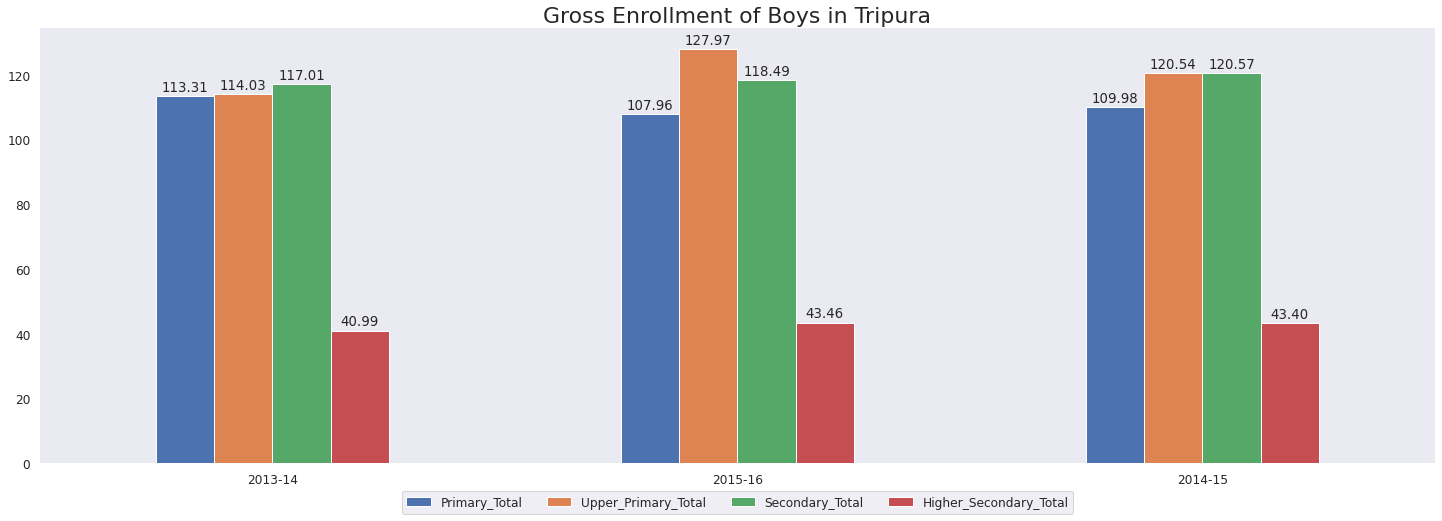

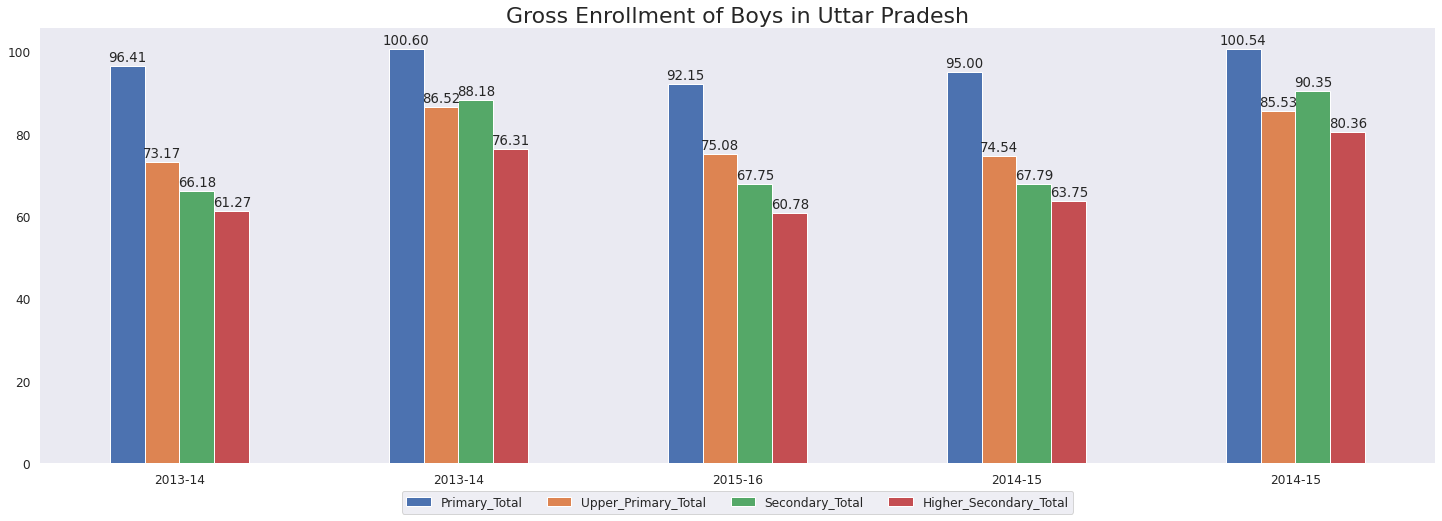

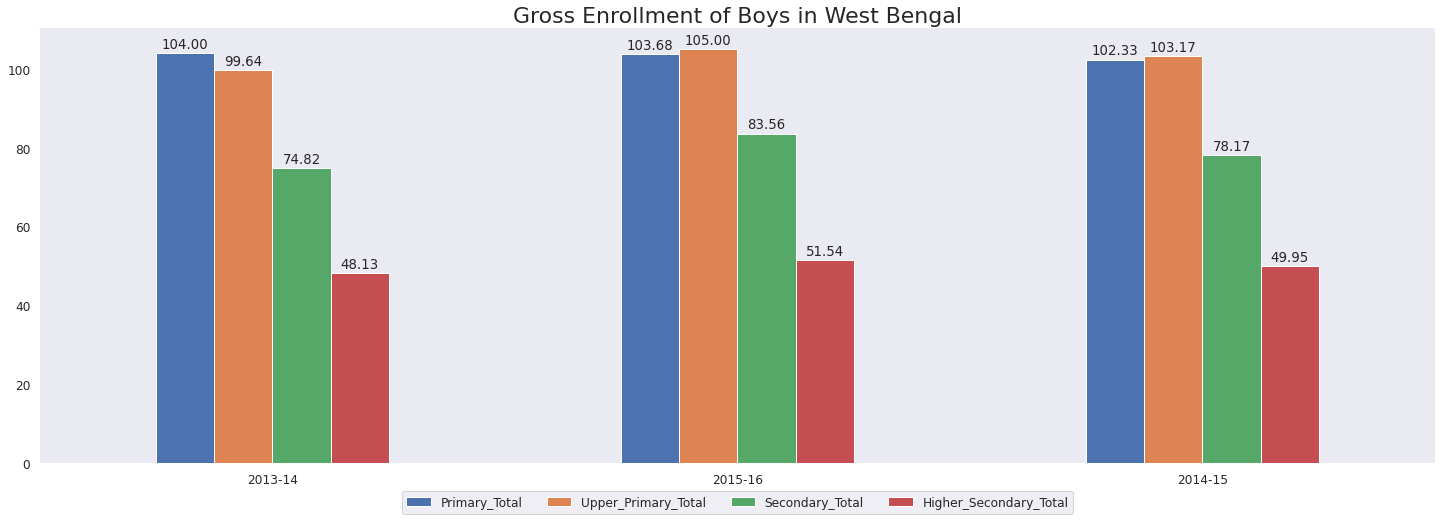

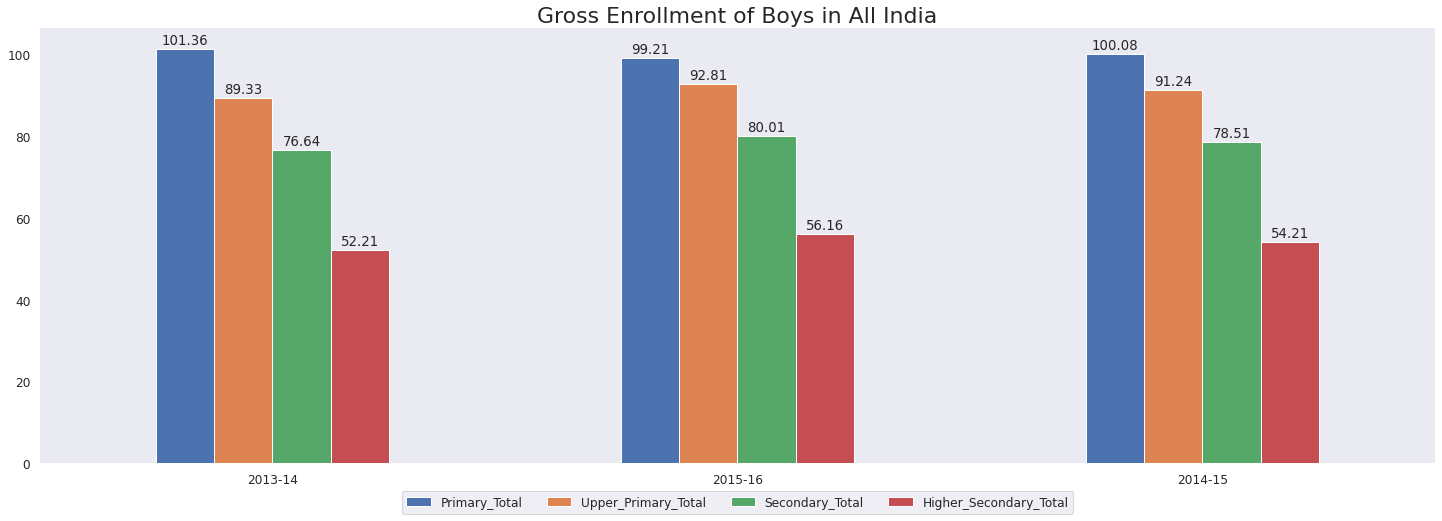

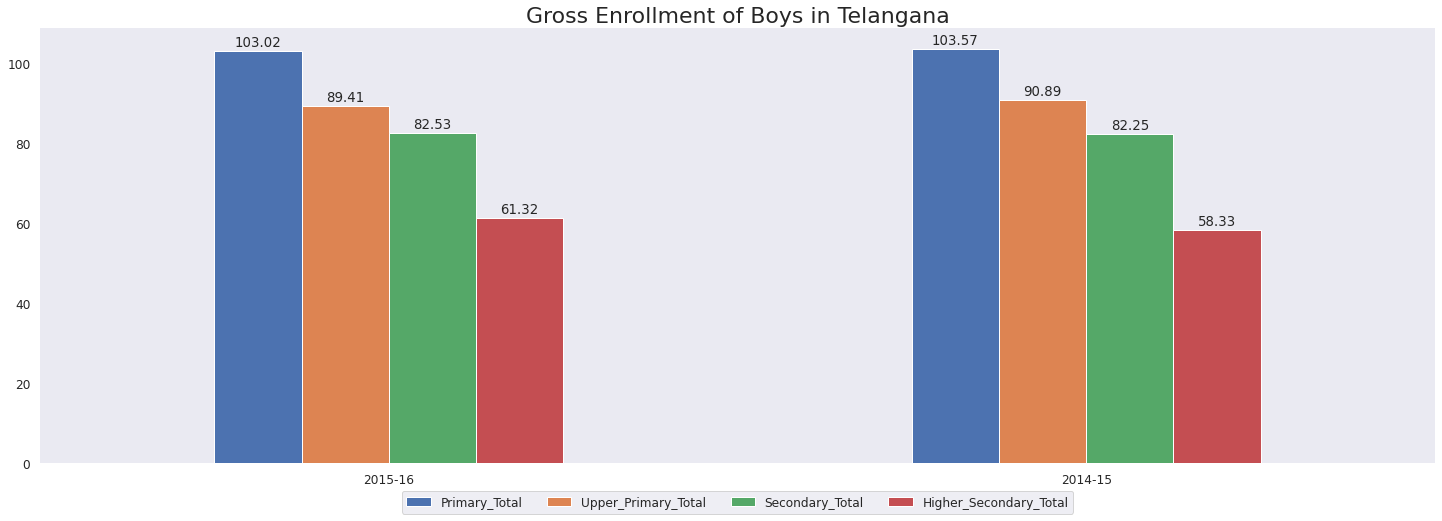

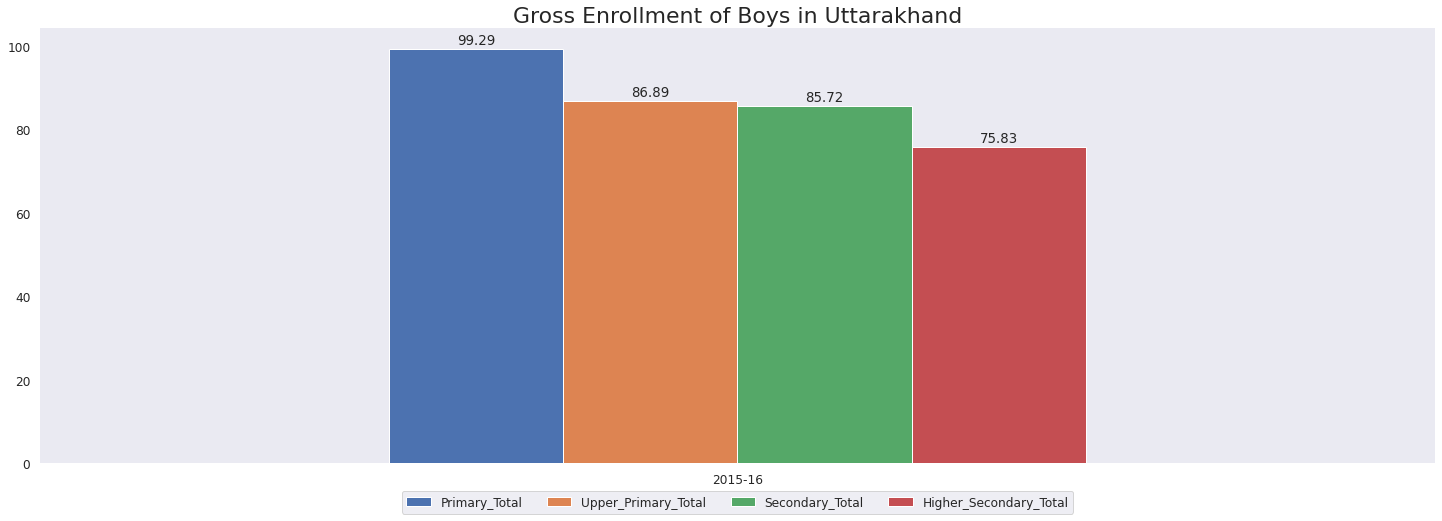

In [108]:
for state in states:
    current = enrol.iloc[np.where(enrol.State_UT == state)]
    sns.set(font_scale = 1.11)
    sns.set_style("dark")
    ax = current[total_categories].plot.bar(figsize=(25,8))
    sns.despine(left=True, bottom=True)

    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title('Gross Enrollment of Boys in {}'.format(current.State_UT.to_list()[0]),size=22)
    ax.set_xticklabels(list(current['Year']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)
    

## Gross Enrollment rise or fall in Student Category over the years

In [109]:
enrol.head(4)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.40,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.30
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94


In [110]:
Primary_13 = enrol.iloc[np.where(enrol.Year=='2013-14')]['Primary_Total'].mean()
Primary_14 = enrol.iloc[np.where(enrol.Year=='2014-15')]['Primary_Total'].mean()
Primary_15 = enrol.iloc[np.where(enrol.Year=='2015-16')]['Primary_Total'].mean()

In [111]:
Upper_Primary_13 = enrol.iloc[np.where(enrol.Year=='2013-14')]['Upper_Primary_Total'].mean()
Upper_Primary_14 = enrol.iloc[np.where(enrol.Year=='2014-15')]['Upper_Primary_Total'].mean()
Upper_Primary_15 = enrol.iloc[np.where(enrol.Year=='2015-16')]['Upper_Primary_Total'].mean()

In [112]:
Secondary_13 = enrol.iloc[np.where(enrol.Year=='2013-14')]['Secondary_Total'].mean()
Secondary_14 = enrol.iloc[np.where(enrol.Year=='2014-15')]['Secondary_Total'].mean()
Secondary_15 = enrol.iloc[np.where(enrol.Year=='2015-16')]['Secondary_Total'].mean()

In [113]:
Higher_Secondary_13 = enrol.iloc[np.where(enrol.Year=='2013-14')]['Higher_Secondary_Total'].mean()
Higher_Secondary_14 = enrol.iloc[np.where(enrol.Year=='2014-15')]['Higher_Secondary_Total'].mean()
Higher_Secondary_15 = enrol.iloc[np.where(enrol.Year=='2015-16')]['Higher_Secondary_Total'].mean()

In [114]:
sns.set_style('white')

In [115]:
primary_df = pd.DataFrame(pd.concat([pd.Series(Primary_13), pd.Series(Primary_14), pd.Series(Primary_15)]), columns=['Primary Student Category'])

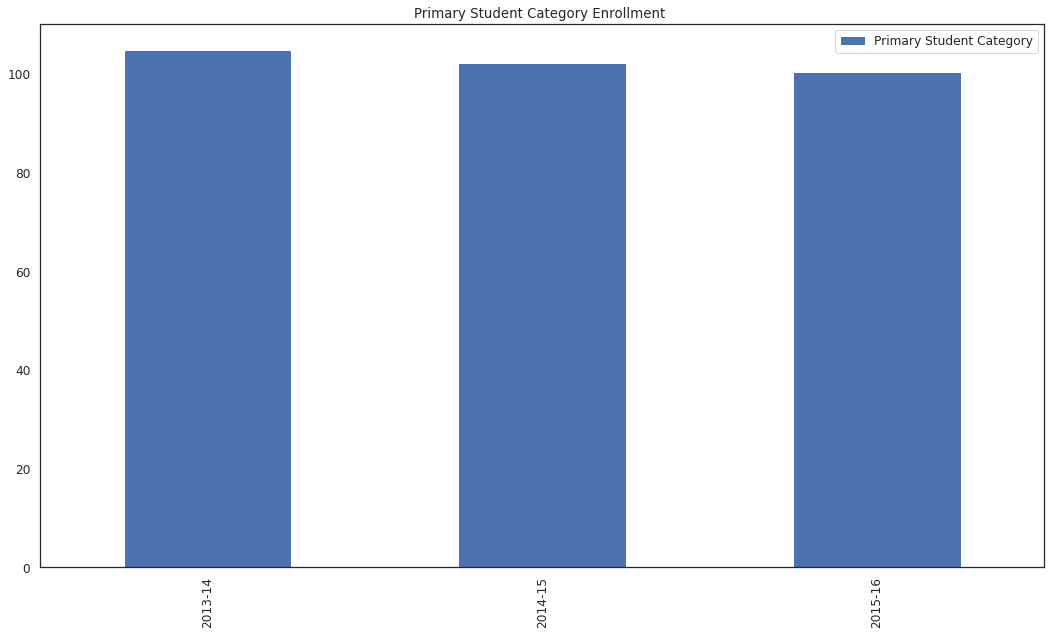

In [126]:
primary_df.index =  ['2013-14', '2014-15','2015-16']
primary_df.plot(kind='bar', figsize=(18, 10), title = 'Primary Student Category Enrollment ')

### From the above image we can see that the highest enrollment for primary session was during the 2013-14 session and further down the years, there's a little drop.

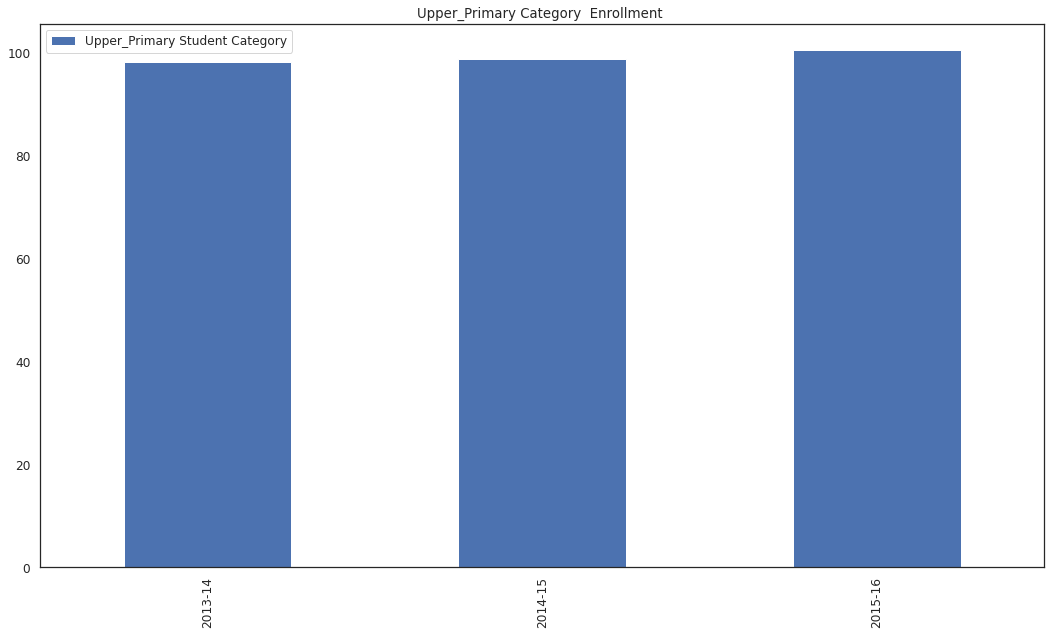

In [127]:
Upper_Primary_df = pd.DataFrame(pd.concat([pd.Series(Upper_Primary_13), pd.Series(Upper_Primary_14), pd.Series(Upper_Primary_15)]), columns=['Upper_Primary Student Category'])

Upper_Primary_df.index =  ['2013-14', '2014-15','2015-16']
Upper_Primary_df.plot(kind='bar', figsize=(18, 10), title = 'Upper_Primary Category  Enrollment ')

## From the above image, there's been a slow increase of enrollments in the upper_primary category from 2013 to 2016 session

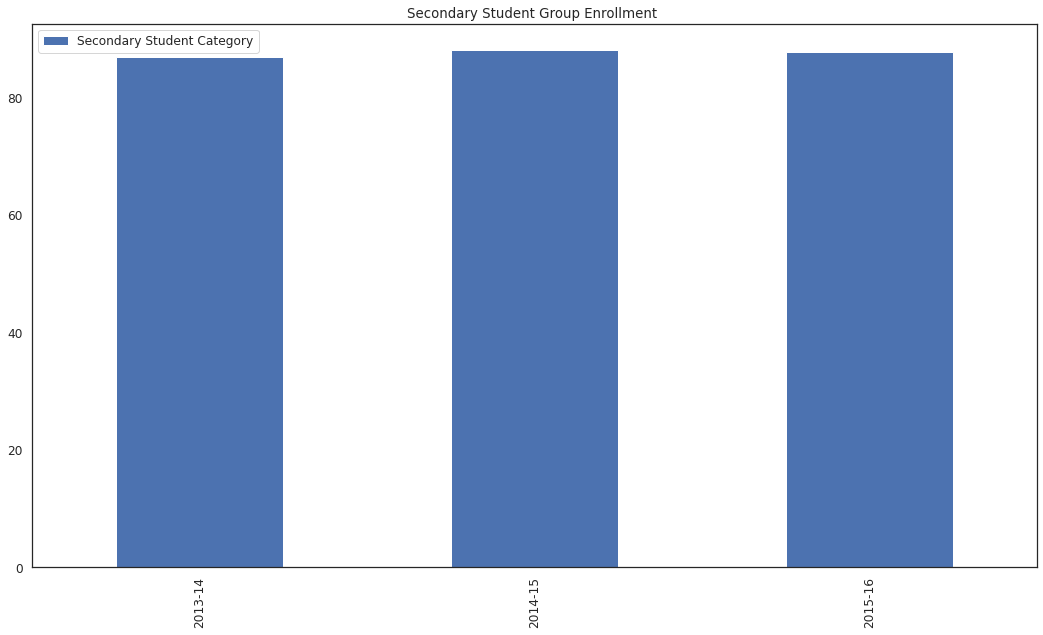

In [128]:
Secondary_df = pd.DataFrame(pd.concat([pd.Series(Secondary_13), pd.Series(Secondary_14), pd.Series(Secondary_15)]), columns=['Secondary Student Category'])

Secondary_df.index =  ['2013-14', '2014-15','2015-16']
Secondary_df.plot(kind='bar', figsize=(18, 10), title = 'Secondary Student Group Enrollment ')

## From the above image, 2014-15 session is when the highest enrollment occured in the Secondary Student Category 

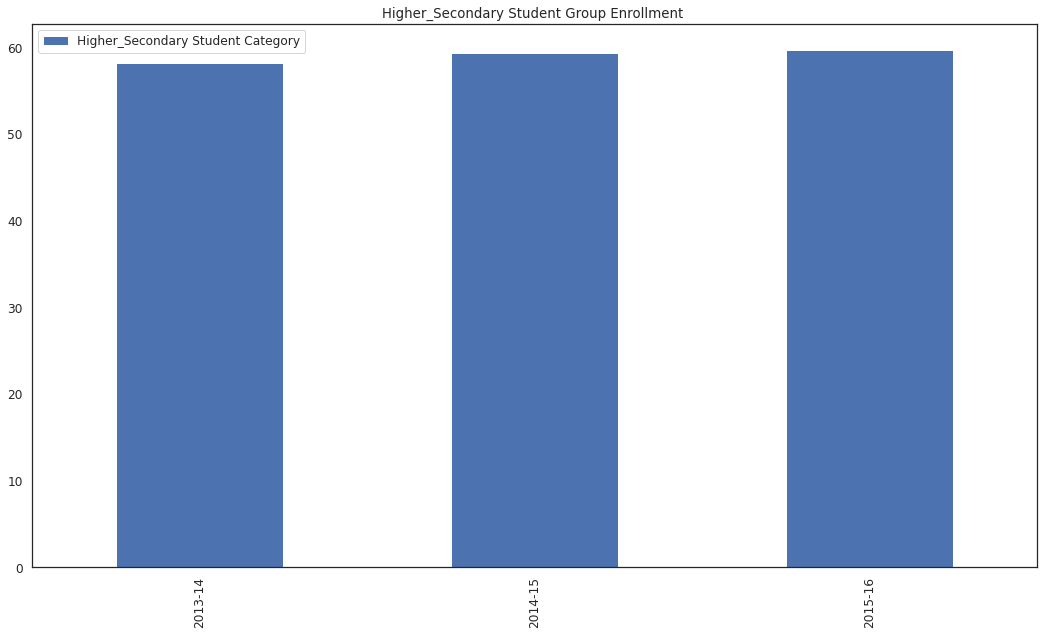

In [129]:
Higher_Secondary_df = pd.DataFrame(pd.concat([pd.Series(Higher_Secondary_13), pd.Series(Higher_Secondary_14), pd.Series(Higher_Secondary_15)]), columns=['Higher_Secondary Student Category'])

Higher_Secondary_df.index =  ['2013-14', '2014-15','2015-16']
Higher_Secondary_df.plot(kind='bar', figsize=(18, 10), title = 'Higher_Secondary Student Group Enrollment ')

## From the above image, 2015-16 session is when the highest enrollment occured in the Higher Secondary Student Category 

## Higher Secondary level of school life has the least average number of enrollment, and the average number of enrollments over the 3 years only slightly increased. 